In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_edited = pd.read_csv('./data/clean_df_final.csv', index_col=0 )

F:\Anaconda\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (7,8,29) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# Reset Display or Max Display setting here

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

#TO SEE EVERYTHING

In [4]:
pd.reset_option('all')
#RUN THIS WHEN DONE SEEING EVERYTHING PLS


: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



F:\Anaconda\envs\learn-env\lib\site-packages\pandas\_config\config.py:622: FutureWarning: 
: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

  warnings.warn(d.msg, FutureWarning)


# Creating new DF of only post 1985

In [5]:
df_edited2 = df_edited[df_edited['year']>2010].copy()

# Fatality Cleaning

In [6]:
df_edited2['total_pop'] = (df_edited2['Total.Fatal.Injuries'] + df_edited2['Total.Minor.Injuries'] + df_edited2['Total.Serious.Injuries'] + df_edited2['Total.Uninjured'])

#Creating total_pop col

In [7]:
#GROUP BY ENGINE AND MAKE

In [8]:
sum_engine_make = df_edited2.groupby(['Make', 'Number.of.Engines']).sum().sort_values(by='total_pop', ascending = False)

In [9]:
sum_engine_make['fatality_perc'] = (sum_engine_make['Total.Fatal.Injuries']/sum_engine_make['total_pop']) * 100
sum_engine_make['injury_perc'] = ((sum_engine_make['Total.Serious.Injuries']+sum_engine_make['Total.Minor.Injuries'])/sum_engine_make['total_pop']) * 100
sum_engine_make['uninjured_perc'] = (sum_engine_make['Total.Uninjured']/sum_engine_make['total_pop']) * 100
sum_engine_make.reset_index(inplace = True)

In [10]:
#GROUP BY MAKE

In [11]:
sum_make = df_edited2.groupby(['Make']).sum().sort_values(by='total_pop', ascending = False)

In [12]:
sum_make['fatality_perc'] = (sum_make['Total.Fatal.Injuries']/sum_make['total_pop']) * 100
sum_make['injury_perc'] = ((sum_make['Total.Serious.Injuries']+sum_make['Total.Minor.Injuries'])/sum_make['total_pop']) * 100
sum_make['uninjured_perc'] = (sum_make['Total.Uninjured']/sum_make['total_pop']) * 100
sum_make.reset_index(inplace = True)

In [13]:
#GROUP BY ENGINE NUM
sum_engine = df_edited2.groupby(['Number.of.Engines']).sum().sort_values(by='total_pop', ascending = False)

In [14]:
sum_engine['fatality_perc'] = (sum_engine['Total.Fatal.Injuries']/sum_engine['total_pop']) * 100
sum_engine['injury_perc'] = ((sum_engine['Total.Serious.Injuries']+sum_engine['Total.Minor.Injuries'])/sum_engine['total_pop']) * 100
sum_engine['uninjured_perc'] = (sum_engine['Total.Uninjured']/sum_engine['total_pop']) * 100
sum_engine.reset_index(inplace = True)

# Fatality Analyzing

In [15]:
new_sum_engine = sum_engine[sum_engine['counter'] >= 75]
new_sum_engine

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,year,counter,total_pop,fatality_perc,injury_perc,uninjured_perc
0,2.0,1466.0,916.0,499.0,54786.0,4239798,2103,57667.0,2.542182,2.453743,95.004075
1,-99.0,4873.0,960.0,717.0,45604.0,6546690,3245,52154.0,9.343483,3.215477,87.441040
2,1.0,4328.0,3657.0,2443.0,13784.0,27996212,13886,24212.0,17.875434,25.194119,56.930448
4,0.0,38.0,66.0,79.0,341.0,423324,210,524.0,7.251908,27.671756,65.076336


In [35]:
new_sum_engine.drop([1], axis = 0, inplace = True)

F:\Anaconda\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [36]:
new_sum_engine.sort_values(by = 'uninjured_perc', ascending = False)

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,year,counter,total_pop,fatality_perc,injury_perc,uninjured_perc
0,2.0,1466.0,916.0,499.0,54786.0,4239798,2103,57667.0,2.542182,2.453743,95.004075
4,0.0,38.0,66.0,79.0,341.0,423324,210,524.0,7.251908,27.671756,65.076336
2,1.0,4328.0,3657.0,2443.0,13784.0,27996212,13886,24212.0,17.875434,25.194119,56.930448


In [17]:
##CONCLUSION: 3 4 and 2 are safest
## 0 and 1 are not safest

In [18]:
new_sum_engine_make = sum_engine_make[sum_engine_make['counter'] >= 75]

In [37]:
new_sum_engine_make = new_sum_engine_make[new_sum_engine_make['Number.of.Engines']!= -99]

In [38]:
new_sum_engine_make.sort_values(by = 'uninjured_perc', ascending = False).head(20)

,Make,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,year,counter,total_pop,fatality_perc,injury_perc,uninjured_perc
2,Airbus,2.0,2.0,106.0,30.0,12064.0,256169,127,12202.0,0.016391,1.114571,98.869038
1,Boeing,2.0,148.0,432.0,153.0,31590.0,645080,320,32323.0,0.457878,1.809857,97.732265
45,Maule,1.0,11.0,25.0,7.0,133.0,233875,116,176.0,6.250000,18.181818,75.568182
47,Stinson,1.0,4.0,39.0,13.0,110.0,191559,95,166.0,2.409639,31.325301,66.265060
3,Cessna,1.0,976.0,973.0,528.0,4621.0,7621290,3780,7098.0,13.750352,21.146802,65.102846
39,Champion,1.0,29.0,31.0,18.0,135.0,278306,138,213.0,13.615023,23.004695,63.380282
18,Beech,2.0,217.0,74.0,55.0,595.0,653143,324,941.0,23.060574,13.708820,63.230606
41,Bellanca,1.0,29.0,23.0,23.0,123.0,272076,135,198.0,14.646465,23.232323,62.121212
51,Diamond,1.0,19.0,20.0,15.0,83.0,165350,82,137.0,13.868613,25.547445,60.583942
43,Aeronca,1.0,23.0,32.0,20.0,112.0,258108,128,187.0,12.299465,27.807487,59.893048


In [39]:
new_sum_engine_make[new_sum_engine_make['Number.of.Engines'] == 2]

,Make,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,year,counter,total_pop,fatality_perc,injury_perc,uninjured_perc
1,Boeing,2.0,148.0,432.0,153.0,31590.0,645080,320,32323.0,0.457878,1.809857,97.732265
2,Airbus,2.0,2.0,106.0,30.0,12064.0,256169,127,12202.0,0.016391,1.114571,98.869038
16,Cessna,2.0,276.0,80.0,57.0,586.0,739961,367,999.0,27.627628,13.713714,58.658659
18,Beech,2.0,217.0,74.0,55.0,595.0,653143,324,941.0,23.060574,13.708820,63.230606
20,Piper,2.0,256.0,57.0,49.0,409.0,628988,312,771.0,33.203632,13.748379,53.047990


# Deeper analyzing into 2 engine Airbus and Boeing

In [40]:
airbus_boeing_2eng = df_edited2.groupby(['Make','Number.of.Engines','Engine.Type']).sum()

In [41]:
airbus_boeing_2eng = airbus_boeing_2eng[airbus_boeing_2eng['counter'] >= 75]

In [42]:
airbus_boeing_2eng['fatality_perc'] = (airbus_boeing_2eng['Total.Fatal.Injuries']/airbus_boeing_2eng['total_pop']) * 100
airbus_boeing_2eng['injury_perc'] = ((airbus_boeing_2eng['Total.Serious.Injuries']+airbus_boeing_2eng['Total.Minor.Injuries'])/airbus_boeing_2eng['total_pop']) * 100
airbus_boeing_2eng['uninjured_perc'] = (airbus_boeing_2eng['Total.Uninjured']/airbus_boeing_2eng['total_pop']) * 100
airbus_boeing_2eng.reset_index(inplace = True)

In [44]:
airbus_boeing_2eng = airbus_boeing_2eng[airbus_boeing_2eng['Number.of.Engines']!=-99]

In [45]:
airbus_boeing_2eng.sort_values('uninjured_perc', ascending = False).head(20)

,Make,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,year,counter,total_pop,fatality_perc,injury_perc,uninjured_perc
3,Airbus,2.0,Turbo Fan,2.0,86.0,22.0,8887.0,151188,75,8997.0,0.022230,1.200400,98.777370
15,Boeing,2.0,Unknown,134.0,44.0,34.0,10534.0,266253,132,10746.0,1.246976,0.725851,98.027173
14,Boeing,2.0,Turbo Fan,7.0,382.0,115.0,19611.0,358711,178,20115.0,0.034800,2.470793,97.494407
26,Maule,1.0,Reciprocating,9.0,22.0,5.0,116.0,203567,101,152.0,5.921053,17.763158,76.315789
9,Beech,2.0,Turbo Prop,70.0,18.0,21.0,290.0,213616,106,399.0,17.543860,9.774436,72.681704
17,Cessna,1.0,Reciprocating,711.0,825.0,396.0,3982.0,6571033,3260,5914.0,12.022320,20.645925,67.331755
35,Stinson,1.0,Reciprocating,4.0,35.0,12.0,98.0,175390,87,149.0,2.684564,31.543624,65.771812
18,Cessna,1.0,Turbo Prop,58.0,39.0,27.0,236.0,167321,83,360.0,16.111111,18.333333,65.555556
21,Champion,1.0,Reciprocating,23.0,29.0,17.0,125.0,252027,125,194.0,11.855670,23.711340,64.432990
0,Aeronca,1.0,Reciprocating,16.0,24.0,17.0,96.0,213642,106,153.0,10.457516,26.797386,62.745098


In [46]:
airbus_boeing_2eng[airbus_boeing_2eng['Make']=='Airbus']

,Make,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,year,counter,total_pop,fatality_perc,injury_perc,uninjured_perc
3,Airbus,2.0,Turbo Fan,2.0,86.0,22.0,8887.0,151188,75,8997.0,0.02223,1.2004,98.77737


# Grouping by Make, Engine Num, Engine Type, and Purpose

In [47]:
df_edited2['Purpose.of.flight'] = df_edited2['Purpose.of.flight'].fillna('Unknown')

In [48]:
purpose_df = df_edited2.groupby(['Make','Number.of.Engines','Engine.Type', 'Purpose.of.flight']).sum()

In [49]:
purpose_df = purpose_df[purpose_df['counter'] >= 75]

In [50]:
purpose_df['fatality_perc'] = (purpose_df['Total.Fatal.Injuries']/purpose_df['total_pop']) * 100
purpose_df['injury_perc'] = ((purpose_df['Total.Serious.Injuries']+purpose_df['Total.Minor.Injuries'])/purpose_df['total_pop']) * 100
purpose_df['uninjured_perc'] = (purpose_df['Total.Uninjured']/purpose_df['total_pop']) * 100
purpose_df.reset_index(inplace = True)

In [52]:
purpose_df = purpose_df[purpose_df['Number.of.Engines']!=-99]

In [53]:
purpose_df.sort_values('uninjured_perc', ascending = False).head(20)

,Make,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,year,counter,total_pop,fatality_perc,injury_perc,uninjured_perc
3,Airbus,2.0,Turbo Fan,Unknown,2.0,86.0,22.0,8887.0,151188,75,8997.0,0.022230,1.200400,98.777370
13,Boeing,2.0,Unknown,Unknown,134.0,44.0,34.0,10528.0,260211,129,10740.0,1.247672,0.726257,98.026071
12,Boeing,2.0,Turbo Fan,Unknown,7.0,382.0,114.0,19421.0,354680,176,19924.0,0.035134,2.489460,97.475407
23,Maule,1.0,Reciprocating,Personal,8.0,17.0,4.0,109.0,185438,92,138.0,5.797101,15.217391,78.985507
15,Cessna,1.0,Reciprocating,Instructional,59.0,135.0,46.0,889.0,1419195,704,1129.0,5.225864,16.031887,78.742250
26,Piper,1.0,Reciprocating,Instructional,49.0,66.0,34.0,431.0,639101,317,580.0,8.448276,17.241379,74.310345
31,Robinson,1.0,Reciprocating,Instructional,11.0,41.0,8.0,161.0,241853,120,221.0,4.977376,22.171946,72.850679
16,Cessna,1.0,Reciprocating,Personal,463.0,517.0,252.0,2527.0,4228817,2098,3759.0,12.317106,20.457569,67.225326
21,Champion,1.0,Reciprocating,Personal,14.0,26.0,14.0,105.0,209691,104,159.0,8.805031,25.157233,66.037736
33,Stinson,1.0,Reciprocating,Personal,4.0,30.0,11.0,84.0,153212,76,129.0,3.100775,31.782946,65.116279


In [54]:
purpose_df[purpose_df['Make']=='Airbus']

,Make,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,year,counter,total_pop,fatality_perc,injury_perc,uninjured_perc
3,Airbus,2.0,Turbo Fan,Unknown,2.0,86.0,22.0,8887.0,151188,75,8997.0,0.02223,1.2004,98.77737


# Weather IMC vs VMC

In [55]:
weather_cond_val = df_edited2['Weather.Condition'].value_counts()

<BarContainer object of 3 artists>

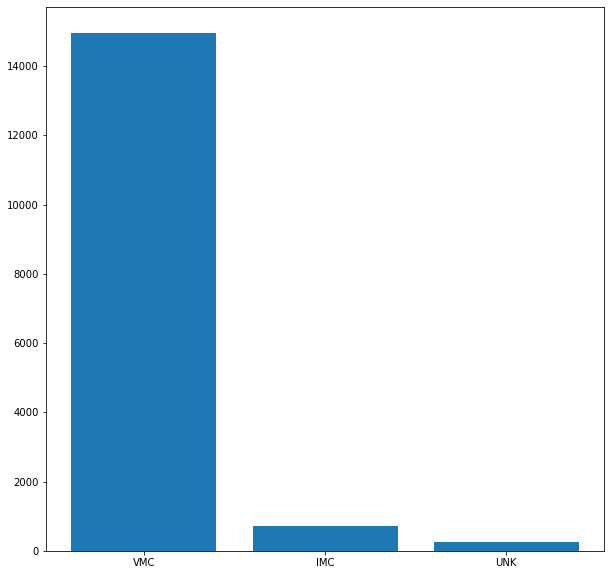

In [56]:
fig, ax = plt.subplots(figsize = (10,10))



ax.bar(x = weather_cond_val.index, height = weather_cond_val.values)

